In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [19]:
data = load_diabetes()

In [5]:
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [20]:
X= data.data
y = data.target

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.8,random_state=10)

In [28]:
model = LinearRegression()

In [29]:
model.fit(X_train,y_train)

LinearRegression()

In [31]:
model.intercept_

152.2555053490769

In [32]:
model.coef_

array([  -3.89155188, -225.62880027,  517.89525355,  328.32132183,
       -727.23345563,  410.96799392,   80.26601137,  218.18738355,
        704.2805541 ,   40.02247238])

In [33]:
y_pred = model.predict(X_test)

In [56]:
y_pred_train = model.predict(X_train)

In [63]:

## Model evaluation on testing data

r2_square = r2_score(y_test,y_pred)
print(f"The value of R_square = {r2_square} ")

mean_squared_er = mean_squared_error(y_test,y_pred)
print(f"mean_squared_error = {mean_squared_er}")

mean_absolute_er = mean_absolute_error(y_test,y_pred)
print(f"mean_absolute_error = {mean_absolute_er}")

The value of R_square = 0.5341962544929233 
mean_squared_error = 2911.8279516891616
mean_absolute_error = 42.79624838980985


In [64]:
## Model evaluation on training data

r2_square = r2_score(y_train,y_pred_train)
print(f"The value of R_square = {r2_square} ")

mean_squared_er = mean_squared_error(y_train,y_pred_train)
print(f"mean_squared_error = {mean_squared_er}")

mean_absolute_er = mean_absolute_error(y_train,y_pred_train)
print(f"mean_absolute_error = {mean_absolute_er}")

The value of R_square = 0.512296822080179 
mean_squared_error = 2851.0252092365863
mean_absolute_error = 43.47090654492663


## Ridge Regression

In [73]:
ridge_model = Ridge(alpha=0.0001)
ridge_model.fit(X_train,y_train)

Ridge(alpha=0.0001)

In [74]:
y_pred_ridge = ridge_model.predict(X_test)

In [75]:
y_pred_ridge_train = ridge_model.predict(X_train)

In [76]:

## Model evaluation on testing data

r2_square = r2_score(y_test,y_pred_ridge)
print(f"The value of R_square = {r2_square} ")

mean_squared_er = mean_squared_error(y_test,y_pred_ridge)
print(f"mean_squared_error = {mean_squared_er}")

mean_absolute_er = mean_absolute_error(y_test,y_pred_ridge)
print(f"mean_absolute_error = {mean_absolute_er}")

The value of R_square = 0.5341508419142531 
mean_squared_error = 2912.111834369809
mean_absolute_error = 42.797228256744546


In [77]:
## Model evaluation on testing data

r2_square = r2_score(y_train,y_pred_ridge_train)
print(f"The value of R_square = {r2_square} ")

mean_squared_er = mean_squared_error(y_train,y_pred_ridge_train)
print(f"mean_squared_error = {mean_squared_er}")

mean_absolute_er = mean_absolute_error(y_train,y_pred_ridge_train)
print(f"mean_absolute_error = {mean_absolute_er}")

The value of R_square = 0.5122961928039844 
mean_squared_error = 2851.0288878722313
mean_absolute_error = 43.47257745441781


## Losso

In [78]:
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression

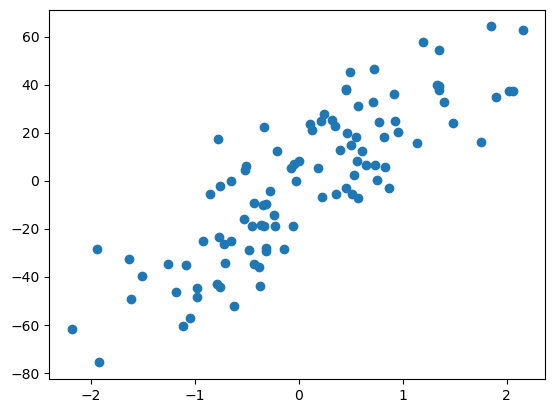

In [92]:
X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)
plt.scatter(X,y)

In [85]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [93]:
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [94]:
reg.coef_

array([28.11017914])

In [95]:
reg.intercept_

-2.8750257420416947

In [97]:
L = Lasso(alpha=0)

0.6440262354503874 0.7171531161828348
0.6254777299217205 0.6858154942234612
0.5424199845840243 0.5918026283453405
-0.02854483736192437 0.0


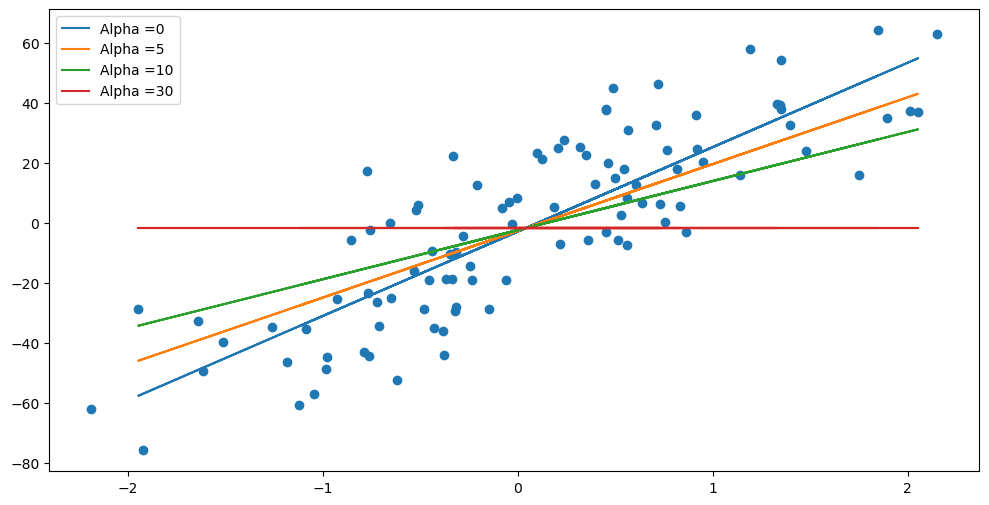

In [108]:
alphas = [0,5,10,30]
plt.figure(figsize=(12,6))
plt.scatter(X,y)
for alpha in alphas:
    L = Lasso(alpha=alpha)
    L.fit(X_train,y_train)
    y_pred_test = L.predict(X_test)
    y_pred_train = L.predict(X_train)
    plt.plot(X_test,y_pred_test,label=f"Alpha ={alpha}")
    r2_square_test = r2_score(y_test,y_pred_test)
    r2_square_train = r2_score(y_train,y_pred_train)
    print(r2_square_test,r2_square_train)
plt.legend()
plt.show()